In [1]:
import os
os.chdir('..')
from source.Cluster import Cluster
from source.Image import Image
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/home/conor/Research/paper'

In [2]:
VH_img = Image(data_dir+'/20170829_VH_0.00089831528412.tif')
VV_img = Image(data_dir+'/20170829_VV_0.00089831528412.tif')
VH_img.read()
VV_img.read()

geographic_bounds = [-97.6256427, -94.3827246, 28.0349412, 31.4594987]
cluster = Cluster(geographic_bounds)

In [3]:
# changed image order to be how it should be in Cluster.py
rgb = cluster.construct_rgb_composite(VV_img, VH_img)

/home/conor/Research/SAR-Methods/source/Image.py:63: RuntimeWarning: divide by zero encountered in log10
  new_band = np.where(self.band != 0., 10.*np.log10(self.band), 0.)
/home/conor/Research/SAR-Methods/source/Cluster.py:40: RuntimeWarning: invalid value encountered in true_divide
  ratio_band = np.divide(VH.band, VV.band)


This is what it looks like on a "normal" color scale [0,1]

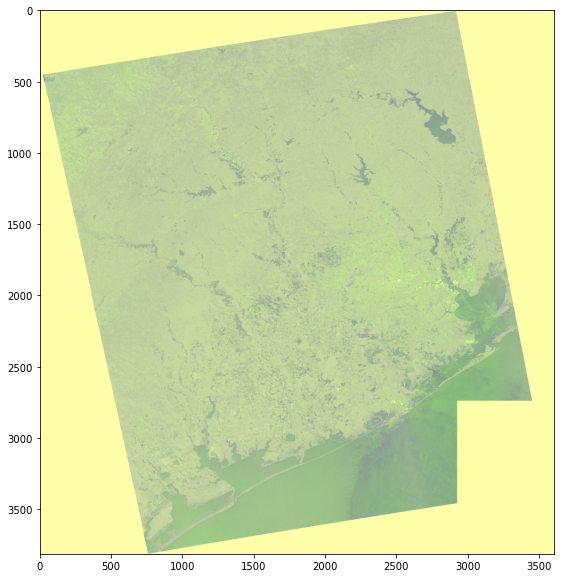

1.0

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.show()
np.max(rgb[:,:,2])

In [5]:
rgb[0,1,:]

array([1.        , 1.        , 0.66902047])

In [6]:
# this code adds a nodata value

bad = rgb[0,0,:]

test = np.full(rgb.shape, rgb[0,0,:])

test2 = np.sum(rgb - test, axis=2)

ys, xs = np.where(test2 == 0)
rgbnew = rgb.copy()
rgbnew[ys,xs] = 999


In [8]:
import rasterio
from rasterio.enums import ColorInterp
tif_path = "/home/conor/Research/kms/RGB_Final2.tif"
tif_kwargs = VV_img.raster.meta.copy()
tif_kwargs.update({
        'nodata': 999,
        'dtype': rgbnew.dtype,
        'count': 3
    })
new_tif = rasterio.open(tif_path, 'w', **tif_kwargs)
new_tif.colorinterp = [ColorInterp.red, ColorInterp.green, ColorInterp.blue]
new_tif.write(rgbnew[:,:,0], indexes=1)
new_tif.write(rgbnew[:,:,1], indexes=2)
new_tif.write(rgbnew[:,:,2], indexes=3)
new_tif.close()